In [61]:
# Import necessary libraries for the project and define output format

from astropy import units as u
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Box
import ipywidgets as widgets
from IPython.display import Math

from scipy import signal
import matplotlib.pyplot as plt

f = '{0:0.1f}'.format

# V_out = 32 * u.V
# I_out = 0.5 * u.A
# V_inmax = 50 * u.V
# V_inmin = 34 * u.V
# V_in = 40 * u.V

# I_ripplemax = 0.5 * I_out
# V_in_ripple_max = 100 * u.mV
# V_out_ripple_max = 200 * u.mV

# f_sw = 350 * u.kHz
# L_out = 220 * u.uH

In [73]:
# This is a container to 

style = {'description_width': 'initial'}

smps_I_out  = widgets.Text(
    value='0.5',
    placeholder='In A',
    description='Output Current:',
    style=style
)

smps_v_in = widgets.Text(
    value = '40',
    placeholder='In V',
    description='Input Voltage:',
    style=style
)

smps_v_out  = widgets.Text(
    value='32',
    placeholder='In V',
    description='Output Voltage:',
    style=style
)

smps_v_in_min = widgets.Text(
    value='34',
    placeholder='In V',
    description='Minimum Input Voltage:',
    style=style
)

smps_v_in_max = widgets.Text(
    value='50',
    placeholder='In Volts',
    description='Maximum Input Voltage:',
    style=style
)

smps_v_in_ripple = widgets.Text(
    value='100',
    placeholder='In mV',
    description='Input Voltage Ripple:',
    width='20%',    
    style=style
)

smps_v_out_ripple  = widgets.Text(
    value='200',
    placeholder='In mV',
    description='Output Voltage Ripple:',
    width='20%',
    style=style
)

smps_i_out_ripple_precent  = widgets.Text(
    value='50',
    placeholder='In %',
    description='Output Current Ripple Precent:',
    width='20%',
    style=style
)

smps_freq = widgets.IntSlider(
    value=350,
    min=100,
    max=1000,
    step=10,
    description='SMPS Switching Frequency:',
#     disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=style
)

smps_vref  = widgets.Text(
    value='1.223',
    placeholder='In V',
    description='Refrence Voltage into the Comperator:',
    width='20%',
    style=style
)

smps_choice = widgets.Select(
    options=['Buck (Step-down)', 'Boost (Step-up)'],
    rows=7,
    description='Converter Choice:',
    style=style,
    width='1000px'
)

controle_scheme = widgets.Select(
    options=['Voltage Mode', 'Current Mode', 'Hysteretic-Mode/D-Cap'],
    rows=7,
    description='Control Scheme:', 
    style=style
)

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

box_layout_1 = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    width='90%')

in_out_params = Box([smps_v_in,smps_v_out,smps_v_in_max,smps_v_in_min,smps_I_out], layout=box_layout_1)

form_items = [
    Box([smps_choice,controle_scheme,in_out_params], layout=form_item_layout),
    Box([smps_v_in_ripple,smps_v_out_ripple,smps_i_out_ripple_precent], layout=form_item_layout),
    Box([smps_freq,smps_vref])
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='100%'
))
form

Box(children=(Box(children=(Select(description='Converter Choice:', options=('Buck (Step-down)', 'Boost (Step-…

In [76]:
# This container saves all user inputs into veriables to be used in this script

smps_choice_value = smps_choice.value
controle_scheme_value = controle_scheme.value

I_out = smps_I_out.value * u.A
V_in = smps_v_in.value * u.V
V_out = smps_v_out.value * u.V
V_inmax = smps_v_in_max.value * u.V
V_inmin = smps_v_in_min.value * u.V
V_in_ripple_max = smps_v_in_ripple.value * u.mV
V_out_ripple_max = smps_v_out_ripple.value * u.mV
I_ripplemax = ((float(smps_i_out_ripple_precent.value)/100)* float(smps_I_out.value)) * u.A

f_sw = smps_freq.value * u.kHz
V_ref = smps_vref.value * u.V

print ('You choose to design a %s. The control scheme associated with your design is a %s \n'
       % (smps_choice_value, controle_scheme_value))

print('Output Current Entered:', I_out)

print('Input Volatge Entered:', V_in)

print('Output Volatge Entered:', V_out)

print('Input Volatge may range from', V_inmin, 'to', V_inmax)

print('Input Volatge Ripple Entered:', V_in_ripple_max)

print('Output Volatge Ripple Entered:', V_out_ripple_max)

print('Maximum Output Current Ripple Entered:', I_ripplemax)

print('Switching Frequency Entered:', f_sw)

print('The Comperator Refrence voltage Entered:', V_ref)


You choose to design a Boost (Step-up). The control scheme associated with your design is a Voltage Mode 

Output Current Entered: 0.5 A
Input Volatge Entered: 40 V
Output Volatge Entered: 32 V
Input Volatge may range from 34 V to 50 V
Input Volatge Ripple Entered: 100 mV
Output Volatge Ripple Entered: 200 mV
Maximum Output Current Ripple Entered: 0.25 A
Switching Frequency Entered: 350.0 kHz
The Comperator Refrence voltage Entered: 1.223 V


In [9]:
if converter_choice_value == 'Buck (Step-down)':
    print('DEFINING EQUATIONS:')
    display(Math(r'D = V_{out}/V_{in}'))
    display(Math(r'\Delta i = \frac {(V_{IN(max)}-V_{out})\times D} {f_s \times L}'))
    display(Math(r'I_{maxout} = I_{LIM(min)}-\frac{\Delta i_L}{2}'))
    display(Math(r'I_{SW(max)} = \frac{\Delta i_L}{2}+I_{OUT(max)}'))

    print('DESIGN INDUCTOR:')
    display(Math(r' L= \frac {(V_{IN(max)}-V_{out})\times V_{out}} {V_{in} \times f_s \times \Delta i }'))
    display(Math(r'\Delta i = (0.2\ to\ 0.4) \times I_{OUT(max)}'))

    print('DESIGN OUTPUT CAPCITOR:')
    display(Math(r' C_{OUT(min)}=  \frac {\Delta i} {8 \times f_s \times V_{out}}'))
    #used euqations from "http://www.ti.com/lit/an/slva477b/slva477b.pdf"

    print('DESIGN INPUT CAPCITOR:')
    display(Math(r' C_{in(min)}=  \frac {} {}'))


    print('DESIGN DIODE (IF NECESSARY):')

elif converter_choice_value=='Boost (Step-up)':
    print('DEFINING EQUATIONS:')
    display(Math(r'D = 1- \frac {V_{in}} {V_{out}}'))
    display(Math(r'\Delta i = \frac {(V_{IN(max)})\times D} {f_s \times L}'))
    display(Math(r'I_{maxout} = (I_{LIM(min)}-\frac{\Delta i_L}{2})\times (1-D)'))
    display(Math(r'I_{SW(max)} = \frac{\Delta i_L}{2}+\frac{I_{OUT(max)}}{1-D}'))

    print('DESIGN INDUCTOR:')
    display(Math(r' L= \frac {(V_{out}-V_{in})\times V_{in}} {V_{out} \times f_s \times \Delta i }'))
    display(Math(r'\Delta i = (0.2\ to\ 0.4) \times I_{OUT(max)} \times \frac {V_{out}} {V_{in}}'))

    print('DESIGN OUTPUT CAPCITOR:')
    display(Math(r' C_{OUT(min)}=  \frac {I_{OUT(max)}\times D} {f_s \times \Delta V_{out}}'))
    #used euqations from "http://www.ti.com/lit/an/slva372c/slva372c.pdf"

    print('DESIGN INPUT CAPCITOR:')
    display(Math(r' C_{in(min)}=  \frac {} {}'))


    print('DESIGN DIODE (IF NECESSARY):')



You choose to design a Buck (Step-down). The control scheme associated with your design is: Voltage Mode 

-------------------------------------------------------------------------------------------------------
DEFINING EQUATIONS:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

DESIGN INDUCTOR:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

DESIGN OUTPUT CAPCITOR:


<IPython.core.display.Math object>

DESIGN INPUT CAPCITOR:


<IPython.core.display.Math object>

DESIGN DIODE (IF NECESSARY):


In [10]:
# Feedback network
V_fb = 1.223 * u.V
R_fb1 = 1 * u.MOhm
R_fb2 = V_fb / (V_out - V_fb) * R_fb1
print('R_fb2 (R_fbb):', f(R_fb2.to(u.kOhm)))

R_fb2_closest = 39.2 * u.kOhm
V_out_actual = V_fb / (R_fb2_closest / (R_fb1 + R_fb2_closest))
print('V_out w/ error:', f(V_out_actual.to(u.V)))

R_fb2 (R_fbb): 39.7 kOhm
V_out w/ error: 32.4 V


In [12]:
# Feedback ripple generator
C_out = 4.7 * u.uF
# C_out = I_ripplemax / (8 * f_sw * V_out_ripple_max)
print('Output capacitor:', f(C_out.to(u.uF)))

R_esr1 = V_out / (2 * V_in * f_sw * C_out)
R_esr2 = 20 * u.mV / I_ripplemax
R_esr = max(R_esr1, R_esr2)
print('R_esr:', f(R_esr.to(u.Ohm)))
C_ff = 1 / (2 * np.pi * f_sw * (R_fb1 ** -1 + R_fb2 ** -1) ** -1)
print('Feed-forward capacitor:', f(C_ff.to(u.pF)))

Output capacitor: 4.7 uF
R_esr: 0.2 Ohm
Feed-forward capacitor: 11.9 pF


In [13]:
# Output Inductor
# L_out = V_out / (f_sw * I_ripplemax) * (1 - V_out / V_in)
print('Selected output inductor value:', f(L_out.to(u.uH)))
I_L_ripple = V_out / (f_sw * L_out) * (1 - V_out / V_inmax)
I_L_peak = I_out + I_L_ripple / 2
print('Output inductor ripple curent:', f(I_L_ripple.to(u.mA)))
print('Output inductor peak current:', f(I_L_peak.to(u.mA)))

Selected output inductor value: 220.0 uH
Output inductor ripple curent: 149.6 mA
Output inductor peak current: 574.8 mA


In [17]:
# Output capacitor
V_out_ripple = I_L_ripple * np.sqrt(R_esr ** 2 + (1 / (8 * f_sw * C_out)) ** 2)
print('Expected output voltage ripple:', f(V_out_ripple.to(u.mV)))

D = 0.9
C_in = I_out * D * (1 - D) / (f_sw * (V_in_ripple_max - I_out * R_esr))
#C_in = 2.2 * u.uF
print('Calculated input capacitor:', f(C_in.to(u.uF)))
V_in_ripple = I_out * D * (1 - D) / (f_sw * C_in) + I_out * R_esr
print('Expected input ripple:', f(V_in_ripple.to(u.mV)))

Expected output voltage ripple: 38.1 mV
Calculated input capacitor: -6.0 uF
Expected input ripple: 100.0 mV


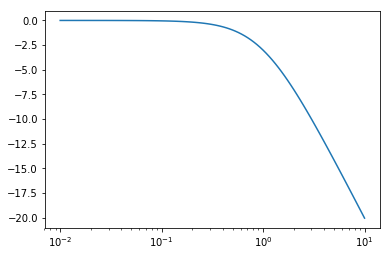

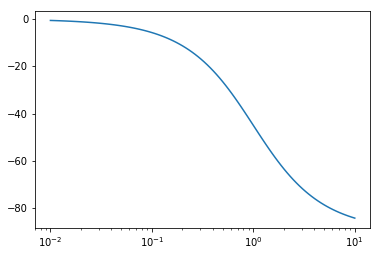

In [18]:
# Will print 

s1 = signal.lti([1], [1, 1])
w, mag, phase = signal.bode(s1)


plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

In [16]:
# Compensation 

# VOLTAGE MODE
# http://www.ti.com/lit/an/slva301/slva301.pdf - Buck
# http://www.ti.com/lit/an/slva633/slva633.pdf - Boost

# Current Mode 
# http://www.ti.com.cn/cn/lit/an/snva555/snva555.pdf - BOTH
# http://www.ti.com/lit/an/slva636/slva636.pdf - Boost
# http://www.ti.com/lit/an/slvae09/slvae09.pdf - Buck

# D-CAP
# More info: https://www.powerelectronics.com/dc-dc-converters/hysteretic-mode-converters-demystified-part-1